In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

母平均が0のt値：2.4665237610867505
母平均が0である確率(p値)：0.016567291258824415
母平均が0のt値：1.4786617417058714
母平均が0である確率(p値)：0.14455007908180437
母平均が0のt値：1.6198183177589314
母平均が0である確率(p値)：0.11060472422111958
母平均が0のt値：3.259381417076276
母平均が0である確率(p値)：0.0018556746350172591
母平均が0のt値：2.5698884718302435
母平均が0である確率(p値)：0.012718919839599337
母平均が0のt値：2.6248669979731165
母平均が0である確率(p値)：0.011020803904524479
母平均が0のt値：0.9710129148853791
母平均が0である確率(p値)：0.3355059270868921
母平均が0のt値：1.5649590298587965
母平均が0である確率(p値)：0.12294083500752523
母平均が0のt値：2.1854394585768335
母平均が0である確率(p値)：0.03283881003038289
母平均が0のt値：1.8831835371085341
母平均が0である確率(p値)：0.06460776251906188


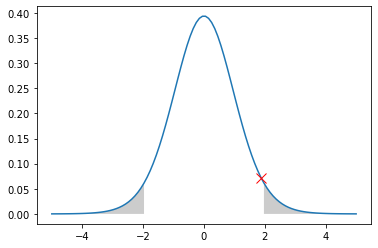

In [331]:
"""1標本t検定"""
# 分布の中心, 標準偏差
center = 1
sigma = 4
# 比較する標本の位置
pos = 0

for i in range(10):
    y = np.random.normal(center, sigma, 60)

    # t値とp値を求める
    t, p = stats.ttest_1samp(y, popmean=pos)
    print(f'母平均が{pos}のt値：'+str(t))
    print(f'母平均が{pos}である確率(p値)：'+str(p))

# サンプル数、由度
n, k = len(y), n-1

############################
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)

# t分布を描画する
x = np.linspace(-5, 5, 100)
ax.plot(x, stats.t.pdf(x, k))

#　分布のt値
ax.plot(t, stats.t.pdf(t, k), 'x', color='red', markersize=10)

# t分布の95%信頼区間から外れた領域を描画する
bottom, up = stats.norm.interval(alpha=0.95)
plt.fill_between(x, stats.t.pdf(x, k), 
                 0, where=(x>=up)|(x<=bottom), facecolor='black', alpha=0.2)

plt.show()